# Part 1: Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
# Create a synthetic dataset. Optional, save it to disk
X, y = datasets.make_classification(n_samples=5000,
                                    n_features=20,
                                    n_informative=4,
                                    n_classes=3,
                                    n_clusters_per_class=1,
                                    class_sep=1.2)
#np.savez("kNN_data.npz", X=X, y=y)

In [3]:
# Load data from disc (in case it was saved)
#loaded_data = np.load("kNN_data.npz")
#print(loaded_data.files)

#X = loaded_data['X']
#y = loaded_data['y']

In [4]:
# Extract input and output data
print(X.shape)
print(y.shape)

(5000, 20)
(5000,)


Unique labels: [0 1 2]


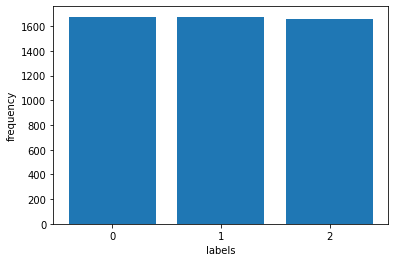

In [5]:
# Look the distribution of labels
print("Unique labels:", np.unique(y))

plt.hist(y, bins=[0, 1, 2, 3], align='left', rwidth=0.8)
plt.xticks([0, 1, 2], labels=['0', '1', '2'])
plt.xlabel('labels')
plt.ylabel('frequency')
plt.show()

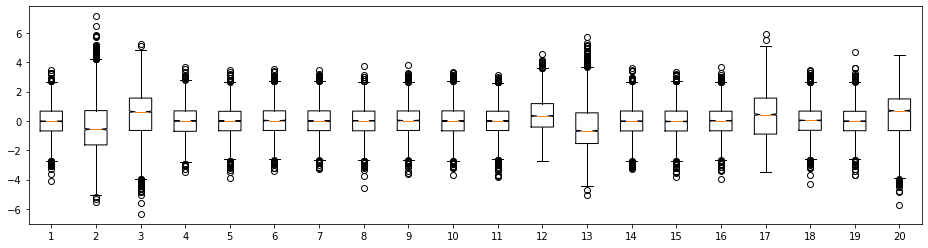

In [6]:
# Look at the distribution of the independent variables
plt.figure(figsize=(16, 4))
plt.boxplot(X, notch=True)
plt.show()

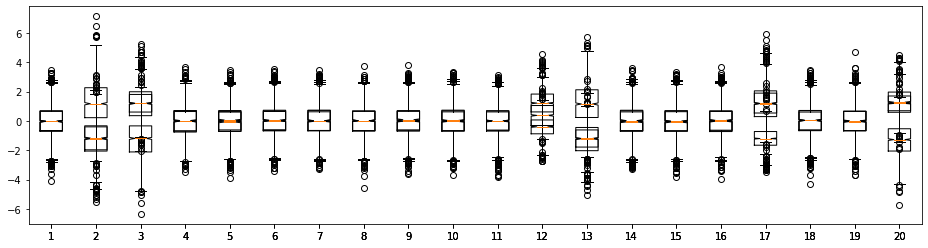

In [7]:
# Look at the distribution of the independent variables
plt.figure(figsize=(16, 4))
plt.boxplot(X[y==0], notch=True)
plt.boxplot(X[y==1], notch=True)
plt.boxplot(X[y==2], notch=True)

plt.show()

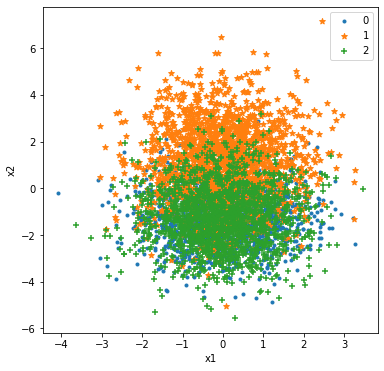

In [8]:
# Plot all points using only two of their features.
# Also plot two random queries
# You might try a differnt set of features
x1 = 0
x2 = 1

plt.figure(figsize=(6, 6))
plt.scatter(X[y==0, x1], X[y==0, x2], marker='.', label='0')
plt.scatter(X[y==1, x1], X[y==1, x2], marker='*', label='1')
plt.scatter(X[y==2, x1], X[y==2, x2], marker='+', label='2')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [9]:
from ipywidgets import widgets

def plot_fun(x1, x2):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y==0, x1], X[y==0, x2], marker='.', label='0')
    plt.scatter(X[y==1, x1], X[y==1, x2], marker='*', label='1')
    plt.scatter(X[y==2, x1], X[y==2, x2], marker='+', label='2')
    plt.legend()
    plt.xlabel(f'x{x1}')
    plt.ylabel(f'x{x2}')
    plt.show()

widgets.interact(plot_fun,
                x1=widgets.IntSlider(min=0, max=X.shape[1]-1),
                x2=widgets.IntSlider(min=0, max=X.shape[1]-1))

interactive(children=(IntSlider(value=0, description='x1', max=19), IntSlider(value=0, description='x2', max=1…

<function __main__.plot_fun(x1, x2)>

In [10]:
# Split data into training, validation, and test sets
# Use only 10 features for now
x_train, x_test, y_train, y_test = train_test_split(X[:, :10], y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(4050, 10)
(450, 10)
(500, 10)
(4050,)
(450,)
(500,)


# Part 2: kNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# Create a kNN classifier and train it on the training set.
# Use 3 nearest neighbors for now
kNN_classifier = KNeighborsClassifier(n_neighbors=3) # create model
kNN_classifier.fit(x_train, y_train)                 # train model

KNeighborsClassifier(n_neighbors=3)

In [13]:
# Print the labels that are know by the trained classifier
print(kNN_classifier.classes_)

[0 1 2]


In [14]:
# Evaluate on the training set first
print(f"Classification score on the training set: {kNN_classifier.score(x_train, y_train):.3f} \n")

Classification score on the training set: 0.839 



In [15]:
# Predict on the validation set first
y_val_hat = kNN_classifier.predict(x_val)

print(f"Classification score on the validation set: {kNN_classifier.score(x_val, y_val):.3f} \n")
# Show the first 20 labels
print(y_val[:20])
print(y_val_hat[:20])

Classification score on the validation set: 0.731 

[2 0 0 0 2 1 1 0 2 2 1 1 0 1 0 2 1 0 1 0]
[2 0 0 0 2 2 1 0 0 1 1 1 0 1 0 1 1 0 1 2]


In [16]:
# Predict on the test set now
y_test_hat = kNN_classifier.predict(x_test)

print(f"Classification score on the test set: {kNN_classifier.score(x_test, y_test):.3f} \n")
print(y_test[:20])
print(y_test_hat[:20])

Classification score on the test set: 0.708 

[2 0 0 0 1 0 1 0 2 0 0 0 0 1 2 0 1 2 0 0]
[0 0 0 0 2 0 1 0 2 0 0 0 0 1 2 0 1 2 0 0]


# Part 3: Experiment with different values of k

In [17]:
for k in [1, 3, 5, 10, 20, 30, 50, 100]:
    print(f"k = {k:3d}")
    # Create model and train it
    kNN_classifier = KNeighborsClassifier(n_neighbors=k)
    kNN_classifier.fit(x_train, y_train)
    # Evaluate and print info
    print(f"  performance on the training set: {kNN_classifier.score(x_train, y_train):.3f}")
    print(f"  performance score on the validation set: {kNN_classifier.score(x_val, y_val):.3f}")

k =   1
  performance on the training set: 1.000
  performance score on the validation set: 0.684
k =   3
  performance on the training set: 0.839
  performance score on the validation set: 0.731
k =   5
  performance on the training set: 0.811
  performance score on the validation set: 0.736
k =  10
  performance on the training set: 0.788
  performance score on the validation set: 0.753
k =  20
  performance on the training set: 0.782
  performance score on the validation set: 0.780
k =  30
  performance on the training set: 0.778
  performance score on the validation set: 0.773
k =  50
  performance on the training set: 0.777
  performance score on the validation set: 0.784
k = 100
  performance on the training set: 0.776
  performance score on the validation set: 0.776


In [18]:
%%time

# Explore k=1, ..., 100
max_k = 100

perf_train = np.zeros(max_k)
perf_val = np.zeros(max_k)

for k in range(1, max_k+1):
    # Create model and train it
    kNN_classifier = KNeighborsClassifier(n_neighbors=k)
    kNN_classifier.fit(x_train, y_train)
    
    # Evaluate and print info
    perf_train[k-1] = kNN_classifier.score(x_train, y_train)
    perf_val[k-1] = kNN_classifier.score(x_val, y_val)

Wall time: 1min 34s


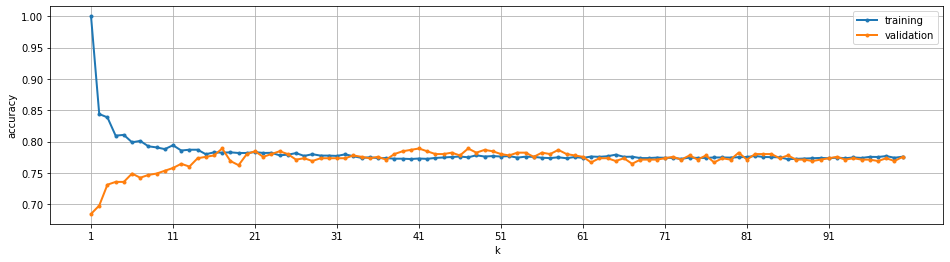

In [19]:
# Plot loss
plt.figure(figsize=(16, 4))
plt.plot(range(1, max_k+1), perf_train, label='training', marker='.', linewidth=2)
plt.plot(range(1, max_k+1), perf_val,   label='validation', marker='.', linewidth=2)
plt.legend()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xticks(ticks=range(1, max_k+1, 10), labels=range(1, max_k+1, 10))
plt.grid(True)
plt.show()

In [20]:
#k=18 seems to give a good model
knn_classifier = KNeighborsClassifier(n_neighbors=18)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [21]:
#Evaluate on all three sets
print(f"Classification score on the training set: {knn_classifier.score(x_train, y_train):.3f}\n")
print(f"Classification score on the validation set: {knn_classifier.score(x_val, y_val):.3f}\n")
print(f"Classification score on the test set: {knn_classifier.score(x_test, y_test):.3f}")

Classification score on the training set: 0.783

Classification score on the validation set: 0.769

Classification score on the test set: 0.756


## Utilizando GridSearch

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
# Define search parameters
grid_params = {'n_neighbors': np.arange(1, 51),
               'metric': ['euclidean', 'manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params)

In [24]:
gs_results = gs.fit(x_train, y_train)

In [25]:
print(f"Best score: {gs_results.best_score_:.3f}")
print(f"Best params: {gs_results.best_params_}")

Best score: 0.766
Best params: {'metric': 'euclidean', 'n_neighbors': 48}


In [26]:
gs_results

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])})

In [27]:
#Evaluate on all three sets
print(f"Classification score on the training set: {gs_results.best_estimator_.score(x_train, y_train):.3f}\n")
print(f"Classification score on the validation set: {gs_results.best_estimator_.score(x_val, y_val):.3f}\n")
print(f"Classification score on the test set: {gs_results.best_estimator_.score(x_test, y_test):.3f}")

Classification score on the training set: 0.778

Classification score on the validation set: 0.782

Classification score on the test set: 0.774


# Part 4: Experiment with more features

In [28]:
# Define the number of features
n_features = [5, 10, 15, 20]

In [29]:
for nf in n_features:
    # Split data (the wrong way)
    x_train, x_test, y_train, y_test = train_test_split(X[:, :nf], y, test_size=0.1)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

    # Create model and train it
    #Se utilizan los hiperparámetros obtenidos de GridSearchCV
    kNN_classifier = KNeighborsClassifier(n_neighbors=21,metric='euclidean')
    kNN_classifier.fit(x_train, y_train)

    # Evaluate and print info
    print(f"Number of features: {nf}")
    print(f"\tperformance on the training set: {kNN_classifier.score(x_train, y_train):.3f}")
    print(f"\tperformance score on the validation set: {kNN_classifier.score(x_val, y_val):.3f}")

Number of features: 5
	performance on the training set: 0.786
	performance score on the validation set: 0.738
Number of features: 10
	performance on the training set: 0.783
	performance score on the validation set: 0.751
Number of features: 15
	performance on the training set: 0.893
	performance score on the validation set: 0.867
Number of features: 20
	performance on the training set: 0.919
	performance score on the validation set: 0.900


In [30]:
# Repeat training with the best model
nf = 20
x_train, x_test, y_train, y_test = train_test_split(X[:, :nf], y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

# Train model
kNN_classifier = KNeighborsClassifier(n_neighbors=22, metric='euclidean')
kNN_classifier.fit(x_train, y_train)
  
# Evaluate and print info
print(f"Number of features: {nf}")
print(f"  performance on the training set: {kNN_classifier.score(x_train, y_train):.3f}")
print(f"  performance score on the validation set: {kNN_classifier.score(x_val, y_val):.3f}")
print(f"  performance score on the test set: {kNN_classifier.score(x_test, y_test):.3f}")

Number of features: 20
  performance on the training set: 0.920
  performance score on the validation set: 0.924
  performance score on the test set: 0.920


# Feature engineering

In [31]:
# Can we find a linear or non-linear combination of variables that could improve
# the classification performance?
# What features are good candidates to be combined?

In [ ]:
# #My solution
# best_acc = 0
# best_set_features = []

# for n_feat in [2,4,8,16,20]:
#     for n in range(10):
#         #Select n_feat features at random
#         rand_vars = np.random.randint(low=0, high=20, size=n_feat)
        
#         #Create and train kNN model with selected features
#         x_train, x_test, y_train, y_test = train_test_split(X[:, rand_vars], y, test_size=0.1)
#         x_train, x_val, y_train, y_val = train_test_split(X[:, rand_vars], y, test_size=0.1)
#         knn_classifier = 